In [17]:
#Libraries

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from pandas import DataFrame
import nltk
import matplotlib.pyplot as plt

In [2]:
#Load data

en_data = pd.read_csv('en_data.csv')
et_data = pd.read_csv('et_data.csv')
for i in en_data.columns:
    if 'Unnamed' in i:
        del en_data[i]
for i in et_data.columns:
    if 'Unnamed' in i:
        del et_data[i]
en_data = en_data[~pd.isnull(en_data['Nouns'])]
et_data = et_data[~pd.isnull(et_data['Nouns'])]

In [3]:
def tokenization_words(sentence):
    #input: sentence as string
    #output: list of words
    return nltk.word_tokenize(sentence)

def get_tfidf_model(data, size_of_keyword):
    cv = CountVectorizer(max_df=0.7, max_features=10000, ngram_range = (size_of_keyword, size_of_keyword))
    words_count_vectors_cleaned = cv.fit_transform(data['Nouns'].tolist())
    tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
    tfidf_transformer_cleaned = tfidf_transformer.fit(words_count_vectors_cleaned)
    # Mapping of index
    feature_names=cv.get_feature_names()
    return cv, tfidf_transformer_cleaned, feature_names

# Helping function - to sort tf-idf vectors
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True) 

# Helping function - to extract top n_keywords number of keywords
def extract_topn_from_vector(feature_names, sorted_items, n_keywords):
    #use only topn items from vector
    sorted_items = sorted_items[:n_keywords]
    score_vals = []
    feature_vals = []
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx]) 
    #create a tuples of feature,score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]    
    return results

# To compute TF-IDF for each product
def tf_idf_computing(doc, tfidf_transformer, cv, feature_names, n_keywords):
    # Calculate TF-IDF for each document 
    tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))
    # Order obtained values by descending order of scores
    sorted_items = sort_coo(tf_idf_vector.tocoo())
    # Extract top n_keywords number of keywords
    keywords = extract_topn_from_vector(feature_names, sorted_items, n_keywords)    
    return keywords

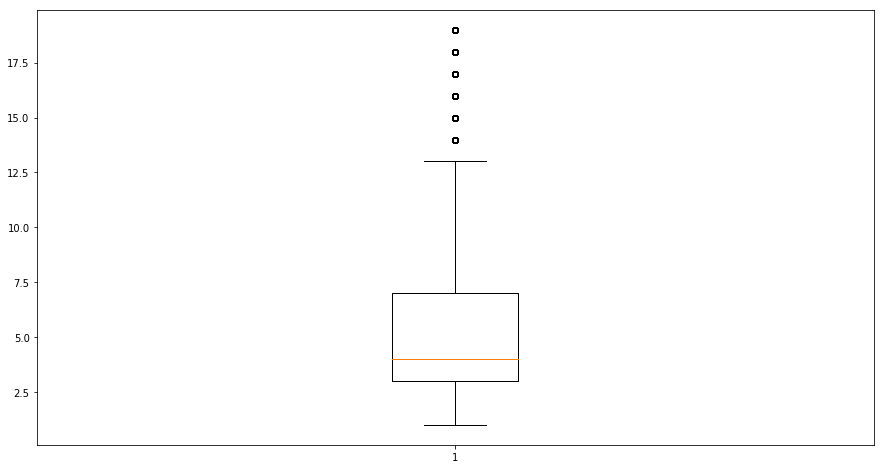

array([4., 4.])

In [11]:
# Find average naumber of words in description for English

en_data['Nouns_lenght'] = en_data['Nouns'].apply(lambda x: len(tokenization_words(x)))
plt.figure(figsize=(15, 8))
en_box_plot = plt.boxplot(en_data['Nouns_lenght'][en_data['Nouns_lenght'] < 20])
plt.show()
en_box_plot['medians'][0].get_ydata()

In [4]:
# Calculate max 4 keywords with scores for each product for English
cv_en1, tfidf_transformer_en1, feature_names_en1 = get_tfidf_model(en_data, 1)
en_data['keywords'] = en_data['Nouns'].apply(lambda x: tf_idf_computing(x, tfidf_transformer_en1, cv_en1, feature_names_en1, min(4, len(tokenization_words(x)))))

In [5]:
en_data.head()

,link,node,text_join,Nouns,keywords
0,<https::nailin.ee::/et/27-akruulvarvid::null::...,node517e8478b3641044f1e2e2bbc31afa,AkruFCuFClvuErv One Stroke Phthalo Green ml,AkruFCuFClvuErv Stroke Phthalo Green ml,"{'akrufcufclvuerv': 0.654, 'stroke': 0.558, 'g..."
1,<http::www.kalastussport.ee::/136-taliridvad::...,nodef5d0383018d768c2279c3541adc8f1a,Winter rod AKARA Legend,Winter rod AKARA Legend,"{'akara': 0.595, 'rod': 0.484, 'legend': 0.482..."
2,<http::www.ittgroup.ee::/en/new-products::null...,nodefeb891dd8590e0d85f9c685e4642449,Digital pressure sensor BMP,Digital pressure sensor BMP,"{'sensor': 0.637, 'pressure': 0.553, 'digital'..."
3,<http::www.ittgroup.ee::/en/31-converters::nul...,node67109f1f1de73f41d2979d4561221,Analogdigital converter bit ADS,converter bit ADS,"{'converter': 0.762, 'bit': 0.647}"
4,<http::www.ittgroup.ee::/en/38-prototyping-and...,node3f349ca61d31b5f8c6bfe56bdb8081,Power Charger VA,Power Charger VA,"{'va': 0.672, 'charger': 0.624, 'power': 0.4}"


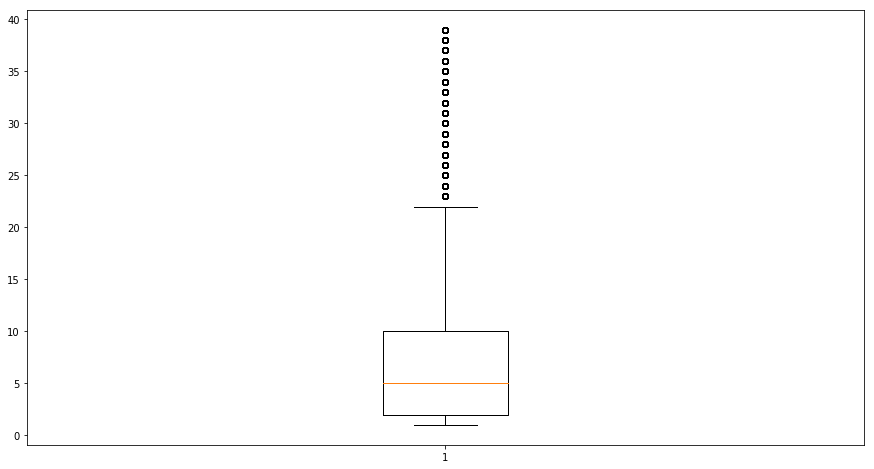

array([5., 5.])

In [14]:
# Find average naumber of words in description for Estonian
import matplotlib.pyplot as plt
et_data['Nouns_lenght'] = et_data['Nouns'].apply(lambda x: len(tokenization_words(x)))
#et_data_test = et_data[et_data['Nouns_lenght']<2500000]
plt.figure(figsize=(15, 8))
et_box_plot = plt.boxplot(et_data['Nouns_lenght'][et_data['Nouns_lenght']<40])
plt.show()
et_box_plot['medians'][0].get_ydata()

In [6]:
# Calculate max 5 keywords with scores for each product for Estonian
cv_et1, tfidf_transformer_et1, feature_names_et1 = get_tfidf_model(et_data, 1)
et_data['keywords'] = et_data['Nouns'].apply(lambda x: tf_idf_computing(x, tfidf_transformer_et1, cv_et1, feature_names_et1, min(5, len(tokenization_words(x)))))

In [7]:
et_data.head()

,link,node,text_join,Nouns,keywords
0,<http::tamberi.eu::/73-ehtekaardid::null::2017...,node6883b5caa683772129c48f93ac5e99,Ehtekaart,Ehtekaart,{'ehtekaart': 1.0}
1,<https::www.paradiis.ee::/et/128-kampaania::p=...,noded2b1c726cca5417aadf2c82e333d51b6,See esinduslik aiamuFuFbel on valmistatud rom...,aiamuFuFbel lossipargi stiilis,"{'aiamufufbel': 0.791, 'stiilis': 0.612}"
2,<https::aiakaubad.ee::/84-telgid::null::201708...,nodeaeeb8b6ba62b6f3fd2eafc75ce1f36c,Alumiiniumtoru luEbimuFuFt uD uAuDcm uDClemis...,Alumiiniumtoru luEbimuFuFt uAuDcm uDClemised t...,"{'oxford': 0.437, 'udclemised': 0.421, 'torud'..."
3,<https::vibes.ee::/et/13-vibraatorid::null::20...,node38302f399536504988c1d1b4703df497,Nutikas sensoriga armukuul mida saad juhtida a...,sensoriga armukuul treening lelu aru lihased t...,"{'lihased': 0.631, 'gballs': 0.347, 'aru': 0.3..."
4,<https::vibes.ee::/et/750-vibraatormunad::null...,node8a81eac4ed95140bdb38ef9291fb4c8,Juhtmevaba pildiga vibraatormuna millega omale...,pildiga vibraatormuna omale vuFi naudingut pak...,"{'pakkudavibratsiooniga': 0.425, 'shiver': 0.4..."


In [20]:
def dict_to_list(keywords):
    new_list = []
    for k in keywords:
        new_list.append(k)
    return new_list

en_data['Keywords_list'] = en_data.keywords.apply(lambda x: dict_to_list(x))
et_data['Keywords_list'] = et_data.keywords.apply(lambda x: dict_to_list(x))

In [23]:
en_data = en_data.drop(columns=['Nouns_lenght'])
et_data = et_data.drop(columns=['Nouns_lenght'])

In [25]:
# Have keywords, need clusters
# Link words with at least one common keywords

def get_unique_keywords(data):
    keywords_series = data.Keywords_list
    all_keywords = []
    for keywords_list in keywords_series:
        for keyword in keywords_list:
            all_keywords.append(keyword)
    unique_keywords = list(set(all_keywords))
    Data = {'Keyword_unique':  unique_keywords, 'Keyword_number': list(range(0, len(unique_keywords)))}
    df = DataFrame (Data, columns = ['Keyword_unique', 'Keyword_number'])
    return df

keywords_en = get_unique_keywords(en_data)
keywords_et = get_unique_keywords(et_data)

In [26]:
def detect_keywords_connection(summary, keywords):
    numbers = []
    for key in summary:
        numbers.append(keywords.Keyword_number[keywords['Keyword_unique'] == key])
    return numbers

en_data['Keywords_numbers'] = en_data.Keywords_list.apply(lambda x: detect_keywords_connection(x, keywords_en))
et_data['Keywords_numbers'] = et_data.Keywords_list.apply(lambda x: detect_keywords_connection(x, keywords_et))

In [28]:
en_data.head()

,link,node,text_join,Nouns,keywords,Keywords_list,Keywords_numbers
0,<https::nailin.ee::/et/27-akruulvarvid::null::...,node517e8478b3641044f1e2e2bbc31afa,AkruFCuFClvuErv One Stroke Phthalo Green ml,AkruFCuFClvuErv Stroke Phthalo Green ml,"{'akrufcufclvuerv': 0.654, 'stroke': 0.558, 'g...","[akrufcufclvuerv, stroke, green, ml]","[[5533], [4062], [4472], [9211]]"
1,<http::www.kalastussport.ee::/136-taliridvad::...,nodef5d0383018d768c2279c3541adc8f1a,Winter rod AKARA Legend,Winter rod AKARA Legend,"{'akara': 0.595, 'rod': 0.484, 'legend': 0.482...","[akara, rod, legend, winter]","[[3997], [4206], [5734], [8169]]"
2,<http::www.ittgroup.ee::/en/new-products::null...,nodefeb891dd8590e0d85f9c685e4642449,Digital pressure sensor BMP,Digital pressure sensor BMP,"{'sensor': 0.637, 'pressure': 0.553, 'digital'...","[sensor, pressure, digital]","[[404], [3312], [5906]]"
3,<http::www.ittgroup.ee::/en/31-converters::nul...,node67109f1f1de73f41d2979d4561221,Analogdigital converter bit ADS,converter bit ADS,"{'converter': 0.762, 'bit': 0.647}","[converter, bit]","[[8680], [8046]]"
4,<http::www.ittgroup.ee::/en/38-prototyping-and...,node3f349ca61d31b5f8c6bfe56bdb8081,Power Charger VA,Power Charger VA,"{'va': 0.672, 'charger': 0.624, 'power': 0.4}","[va, charger, power]","[[8903], [7662], [5784]]"


In [29]:
en_data.to_csv('Results/en_data_tfidf.csv')

In [30]:
et_data.to_csv('Results/et_data_tfidf.csv')

In [27]:
# правки к уже написанному
# подумать на счет параметров dbscan-a или хотя бы как облагородить 3х-цветный график
# чекнуть как строить графы в спарке и подходит ли мой формат данных для этого 
# чекнуть код и данные Мадиса, старые данные н-квады у меня есть, вопрос можно ли построить граф по методу Мадиса
# писать новые главы диплома - Методы все по топик моделингу 
#и соответствующий кусок Результатов со всеми картинками графиками и пояснением к выбору всех параметров 